# Homework 5
## Tyler Lang

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import RidgeCV, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.io as io

# Question 1: Conceptual Questions [30 Points]

### Part a: 

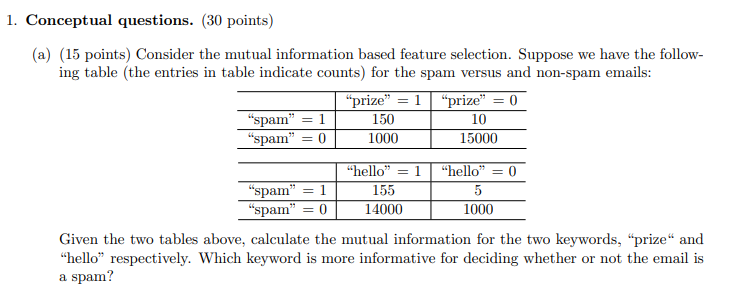

To calculate the mutual information for both the words "prize" and "hello", we use the equation $I(U;C)$ per feature, or per word, in this case. 

The equation is directly stated in lecture, and is the following: 

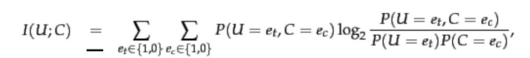

Thus, I simply have to take the probability of a word appearing for a particular class (spam vs not spam), vs not appearing in the particular class, and sum all these probabilities, multiplied by the log of the same probability of the given word appearing in the given class, divided by the separate probabilities of the word itself appearing times that of the given class appearing.

Thus, we can get all of the inputs necessary by simply summing! 

Now I will be solving each problem individually: 

#### "Prize"

We thus have the following inputs, which we will be using in our equation: 

- $N = 16160$
- $P(U = 1, C = 1) = \frac{150}{16160} $
- $P(U = 0, C = 1) = \frac{10}{16160}$
- $P(U = 1, C = 0) = \frac{1000}{16160}$
- $P(U = 0, C = 0) = \frac{15000}{16160}$
- $P(U = 1) = \frac{150+1000}{16160}$
- $P(U = 0) = \frac{10+15000}{16160}$
- $P(C = 1) = \frac{150+10}{16160}$
- $P(C = 0) = \frac{1000+15000}{16160}$


Thus, our final equation is 

$ \frac{150}{16160} \cdot log_2(\frac{\frac{150}{16160}}{\frac{150+1000}{16160}\cdot\frac{150+10}{16160}}) + \frac{10}{16160}\cdot log_2(\frac{\frac{10}{16160}}{\frac{10+15000}{16160} \cdot \frac{150+10}{16160}}) +  \frac{1000}{16160} \cdot log_2(\frac{\frac{1000}{16160}}{\frac{150+1000}{16160} \cdot \frac{1000+15000}{16160}}) + \frac{15000}{16160} \cdot log_2(\frac{\frac{15000}{16160}}{\frac{10+15000}{16160} \cdot\frac{1000+15000}{16160} })$


Simplifying this, we get: $I(U;C) = 0.032960118764 $

#### "hello"

- $N = 16160$
- $P(U = 1, C = 1) = \frac{155}{16160} $
- $P(U = 0, C = 1) = \frac{5}{16160}$
- $P(U = 1, C = 0) = \frac{14000}{16160}$
- $P(U = 0, C = 0) = \frac{2000}{16160}$
- $P(U = 1) = \frac{155+14000}{16160}$
- $P(U = 0) = \frac{5+2000}{16160}$
- $P(C = 1) = \frac{155+5}{16160}$
- $P(C = 0) = \frac{14000+2000}{16160}$


Thus, our final equation is 

$ \frac{155}{16160} \cdot log_2(\frac{\frac{155}{16160}}{\frac{155+14000}{16160}\cdot\frac{155+5}{16160}}) + \frac{5}{16160}\cdot log_2(\frac{\frac{5}{16160}}{\frac{5+2000}{16160} \cdot \frac{155+5}{16160}}) +  \frac{14000}{16160} \cdot log_2(\frac{\frac{14000}{16160}}{\frac{155+14000}{16160} \cdot \frac{14000+2000}{16160}}) + \frac{2000}{16160} \cdot log_2(\frac{\frac{2000}{16160}}{\frac{5+2000}{16160} \cdot\frac{14000+2000}{16160} })$

Simplifying this, we get: $I(U;C) =  0.000783935223234$

Thus, as can be seen, **the word "prize" is much more informative in deciding if an email is spam**, over "hello". Remember that with the mutual information calculation, we are basically checking for an imbalance in word frequency in one class or another. If a particular word always shows up for a particular class over another, whether the class be 0 or 1 (spam vs not spam), then we would get a high value for $(I(U;C)$. However, if the frequencies were to be nearly the same, then the value would be low, indicating that it is not very informative (whether the word appear a lot in both classes, or equally little). 

Thus, as can be seen, we can tell simply by looking at the numbers, we can see that the balance of prize showing up vs not showing up in spam is much greater than that for non-spam emails. Furthermore, for "hello," it is much more balanced, considering the frequencies of spam and non-spam emails.

## Part b

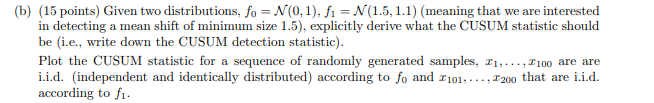

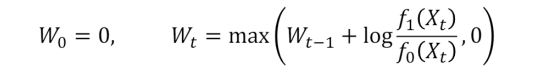

For this problem, we have to plot a CUSUM detection statistic based on two normal distributions: f0 and f1. f0 has mean = 0, standard deviation = 1, and f1 has mean = 1.5, sd = 1.1. 

Thus, a CUSUM model should be able to detect this change in distribution for an array of x-values, with the first hundred following the distribution of f0, and the second hundred following the distribution of f1. 

CUSUM serves as a running sum of change detection over each successive "time period" or successive value (in this case, over each successive x), which has a floor-value of 0, to be able to be sensitive to change, while being resistant to noise. Thus, to follow a normal distribution, each function of f would follow the following formula: 

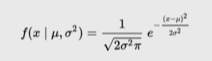

Thus, I create my own function in python using this formula, as can be seen below, and create two arrays of x0 and x1, following the distributions as mentioned above. Finally, I concatenate these two x-arrays, to make one final array of 200 values, the first 100 taken from x0, and the second 100 taken from x1. 

Then, using the CUSUM formula mentioned above, I can go through all 200 values of x, and take a running sum, save that running sum in a list each iteration, and finally plot all the running sums to see if the running increases (usually to a certain threshold), or if it stays along the same mean, or increases and decreases without trend. The idea is that, if there is no change (if x0 and x1 came from the same distribution), the CUSUM equation would be flat, as the expectation of the division of f1/f0 would = 1, and the log of 1 = 0. Just mathematically deriving the first iteration, we'd get the following: 


### Starting with w = 0, $x_0$:

First, we find the values of $f_1(x_0), f_0(x_0)$:

$f_1(x_0)$ = $\frac{e^{-(x-\mu)^2}/(2\sigma^2}{\sigma\sqrt{2\pi}}$ = $\frac{e^{-(x_0 - 0)^2}/(2*1)^2}{1*\sqrt{2\pi}}$, which we will call "$v_{1,0}$"

$f_0(x_0)$ = $\frac{e^{-(x-\mu)^2}/(2\sigma^2}{\sigma\sqrt{2\pi}}$ = $\frac{e^{-(x_0 - 1.5)^2}/(2*1.1)^2}{1.1*\sqrt{2\pi}}$, which we will call "$v_{0,0}$"

Then, taking $w_{i+1} = log(\frac{v_{1,0}}{v_{0,0}})$, we add $w_i + w_{i+1}$ (the sum added to the running sum), and if this new net running sum <0, we simply reset w to 0.

Then, we repeat with our new w, and move on to $x_1$

I will now solve this using a computer, with random values for x0 and x1, as explained above, with x0 values following the f0 distribution, and the x1 values following the f1 distribution:

In [2]:
def f(x,mu,var):
    sd = np.sqrt(var)
    e = np.e
    pi = np.pi
    return (e**((-(x-mu)**2)/2*sd**2))/(sd*(2*pi)**0.5)

np.random.seed(1993)

x0 = np.random.normal(0,1,100)
x1 = np.random.normal(1.5,1.1,100)
x_vals = np.concatenate([x0,x1])

In [3]:
vals = []
for i in x_vals:
    temp = np.log(f(i,1.5,1.1)/f(i,0,1))
    vals.append(temp)

cusum_vals = []
cusum = 0
w = 0 
for i in vals:
    cusum = max(w + i,0)
    w = cusum
    cusum_vals.append(w)

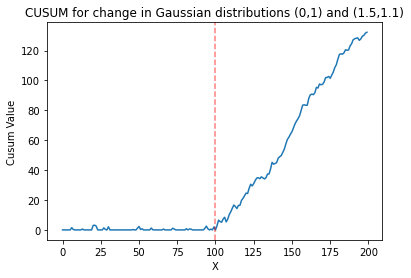

In [4]:
plt.plot(cusum_vals)
plt.axvline(x=100,c='r',linestyle='--',alpha=0.5)
plt.xlabel('X')
plt.ylabel('Cusum Value')
plt.title('CUSUM for change in Gaussian distributions (0,1) and (1.5,1.1)')
plt.show()

After performing CUSUM by first taking the equation values for log(f(1)/f(0)), I run these values through the max(w + i, 0) formula, and save each iteration of "w". Then, I plot this. As can be seen in the plot, the running sum increases drastically as soon as the distribution changes, which makes complete sense! Since x1s have a higher mean and only a slightly higher standard deviation, the division of f(1)/f(0) on x-values from distribution f(1) would have a positive value, which would increase the running sum over each iteration, per expectation, with some random flat areas due to randomness of the two distributions of x. 

# Question 2: House Price Dataset [30 points]

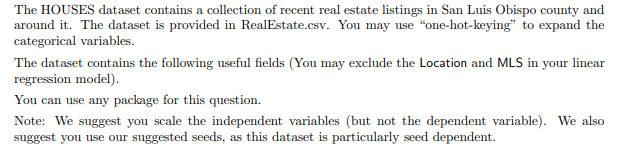

For this question, we will be using Ridge and Lasso regression with a very specific dataset to see how both these algorithms deal with data with correlated or colinear predictors, and perform variable selection. 

Ridge is generally used to deflate certain predictors that are correlated with other predictors, by setting a constraint on the sum of squared coefficients, which forces certain coefficients to be reduced when a binding constraint is set. As ridge is solved using a relaxation problem -- a Langrangian optimization problem, in which the hard constraint is converted to a weighted penalizer to the objective function, we can set different values of alpha, in this case, to penalize the objective value more with increasing alphas. The higher the penalization term, the more that the coefficients will be reduced. 

Lasso, on the other hand, works nearly the same, but instead it sets a limit on the sum of coefficients (not the sum of squared coefficients). Thus, due to the shape of the feasible region, Lasso is actually able to easily reduce certain variables all the way to 0, while Ridge often cannot achieve 0. This means that Lasso is able to perform variable selection, while ridge is able to reduce the weights of certain correlated predictors. The issue with ridge is that it arbitrarily picks one of the correlated variables to reduce the coefficient of, which is random, and might reduce explanability of final coefficients.

Thus, to start this question, I will first load the data, separate the xs and ys, turn the categorical variable into dummy variables, and finally scale the xs, which is necessary for both ridge and lasso, as they both regulate the final coefficients, which are directly dependent on the scale of the variables. This can be seen in the code cell below. 

In [5]:
houses_raw = pd.read_csv(r'data/RealEstate.csv')
houses_raw = houses_raw.drop(['MLS','Location'],axis=1)
houses_raw = pd.get_dummies(houses_raw,columns=['Status'])
x = houses_raw.drop(['Price'],axis=1)
y = houses_raw['Price']
x_scaled_array = StandardScaler().fit_transform(x)
x_scaled = pd.DataFrame(x_scaled_array, index=x.index, columns=x.columns)
houses = pd.concat([x_scaled,y],axis=1)

<AxesSubplot:>

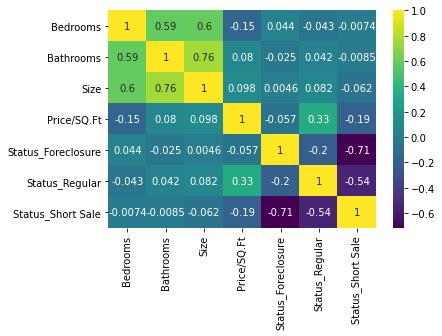

In [6]:
sns.heatmap(x_scaled.corr(),annot=True,cmap='viridis')

Finally, just as a sanity check, I plot a correlation heat map, to be able to see and remember which variables are highly correlated. First of all, we know that the three STATUS variables are perfectly colinear, due to the fact that they are dummies for the same exhaustive list of STATUS, meaning that one of the statuses is perfectly predictable by the values of the other two (if "regular" and "short_sale" both = 0, then "forclosure" must = 1). This will be important to remember when checking relative coefficient values. 

Finally, as expected, Bedrooms and Bathrooms are highly correlated, as is size with bedrooms and bathrooms (more with bedrooms, which makes sense, as bedrooms are bigger than bathrooms!). 

Finally, just to note, we are predicting **price**, and we have "Size" and "Price/Sq. Ft" as predictors, which alone can PERFECTLY PREDICT price (rather, can perfectly CALCULATE price!) 

So before any analaysis, I expect one or two of the status variables' coefficients to be larger than that of the third (with the third being selected arbitrarily) in ridge, and possibly one of them reduced to 0 in LASSO... one of the coefficients of bedrooms or bathrooms or size to be reduced in ridge... and finally, size and price/sq ft to have huge coefficients compared to the other variables. 

Let's see if my predictions are true! 

## Part a: Ridge Regression

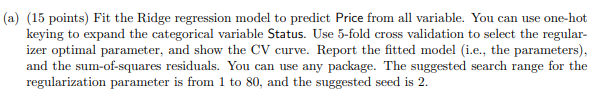

To start ridge, I set my seed, and take a list of potential alpha values, which I will pass into a cross-validation algorithm to check for the best value of alpha (leads to more precise predictions). 

In [7]:
np.random.seed(2)
r = Ridge()
alphas = list(np.arange(1,100,1))
param = {
    'alpha':alphas,
    'fit_intercept':[True],
    'normalize':[False]
       }
#mse_scorer = make_scorer(mean_squared_error)
search = GridSearchCV(r,param, scoring='neg_root_mean_squared_error',cv=5)
result = search.fit(x_scaled,y)
cv_scores = search.cv_results_['mean_test_score']
print('Best Hyperparameters: %s' % result.best_params_)

Best Hyperparameters: {'alpha': 45, 'fit_intercept': True, 'normalize': False}


As can be seen, cross validation found a=45 to be the optimal value of alpha, using the scoring function "negative root mean squared error", which was recommended to us in a TA session. The mean-score of cross-validation per value of alpha is plotted below:

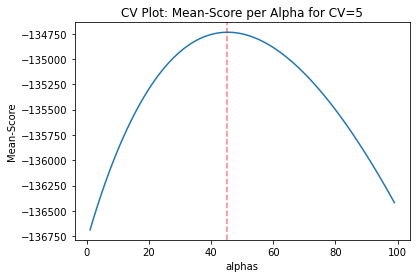

In [8]:
np.random.seed(2)
plt.plot(alphas,cv_scores)
plt.axvline(x=45,linestyle='--',c='r',alpha=0.5)
plt.title("CV Plot: Mean-Score per Alpha for CV=5")
plt.xlabel("alphas")
plt.ylabel("Mean-Score")
plt.show()

As can be seen, the accuracy rises over each additional value of alpha, until it caps at 45. This means that, for ridge, the model benefits from reducing certain variables' coefficients, which helps deal with inter-correlated predictors having double effects on the final model's predictions. Once the model punishes coefficients too much, however, then it starts to reduce accuracy.

Then, finally I use this optimal alpha of 45, and train a Ridge model with the full set of data. Finally, after training the model, I print the parameters, as requested by the instructions:

In [9]:
##### np.random.seed(2)
ridge = Ridge(alpha=45,normalize=False, random_state = 2)
ridge.fit(x_scaled,y)
ridge.get_params()

{'alpha': 45,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': False,
 'random_state': 2,
 'solver': 'auto',
 'tol': 0.001}

Then, I print the coefficients per variable. Keep note that these coefficients are huge, because the data is scaled, and price is not scaled. Thus, with variables being of such a small value, the coefficient has to be huge to arrive at the price of a house. 

In [10]:
for name,coef in zip(list(x_scaled.columns),ridge.coef_):
    print(f"The coefficient for {name} is: {coef:,.0f}")

The coefficient for Bedrooms is: -5,221
The coefficient for Bathrooms is: 27,459
The coefficient for Size is: 182,393
The coefficient for Price/SQ.Ft is: 200,039
The coefficient for Status_Foreclosure is: -1,562
The coefficient for Status_Regular is: 12,459
The coefficient for Status_Short Sale is: -7,565


Notice how Ridge worked just like I thought! First off, the coefficients for Size and Price/Sq.Ft are HUGE, and the other coefficients are very highly reduced, compared to those two. Furthermore, bathroom surprisingly has a much bigger absolute coefficient than bedrooms, which I also expected, due to the high correlation (although I expected bedrooms to be prioritized)! However, it might make sense, given that bedroom is also more highly correlated with size, and thus bathroom is the less-inter-correlated variable of the three. 

Finally, we see that, for the three Status variables, they have declining absolute values, with one "relatively close" to 0 (foreclosure). 

Finally, I can plot how the weights change over each value of alpha, which I do below: 

Notice that the x-values increase from right to left.

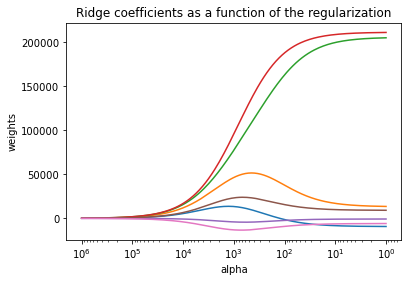

In [11]:
np.random.seed(2)
n_alphas = 200
alphas = np.logspace(0,6, n_alphas)

coefs = []
for a in alphas:
    r = Ridge(alpha=a, normalize=False)
    r.fit(x_scaled, y)
    coefs.append(r.coef_)

# #############################################################################
# Display results

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization")
plt.axis("tight")
plt.show()

Finally, as asked in the question, I use this trained model and predict on the same full set of data, to see what the models residual sum of squares is. Note that the RSS will be HUGE here, because of the small scale of the data, and the resulting big coefficients (due to the large scale of "price"). 

In [12]:
y_preds = ridge.predict(x_scaled)
rss = sum((y_preds-y)**2)
print(f"Residual Sum of Squares: {rss:,.0f}")

Residual Sum of Squares: 16,551,222,787,074


## Part b: Lasso

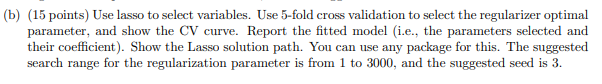

Now, we will perform the same process on the same data, but this time use a LASSO model. Remember that the point of LASSO is more to perform variable selection and reduce certain coefficients to 0. 

I thus do as I did before, and use cross-validation to train the optimal alpha value, which the instructions explicitly state to run from 1 to 3000. I do this below:

In [13]:
np.random.seed(3)
L = Lasso(random_state=3)
alphas_L = list(np.arange(1,3000,10))
param_L = {
    'alpha':alphas_L,
    'fit_intercept':[True],
    'normalize':[False]
       }
search_L = GridSearchCV(L,param_L,scoring = 'neg_root_mean_squared_error',cv=5)
result_L = search_L.fit(x_scaled,y)
cv_scores_L = search_L.cv_results_['mean_test_score']
print('Best Hyperparameters: %s' % result_L.best_params_)

Best Hyperparameters: {'alpha': 1, 'fit_intercept': True, 'normalize': False}


As can be seen, the optimal alpha is the minimum of the range: 1! Thus, the best model is one that minimizes the punishment on the higher coefficients, which might be due to the fact that the model does best when the coefficients for our biggest predictors are very high, even if the rest of the variables don't get pushed to 0.

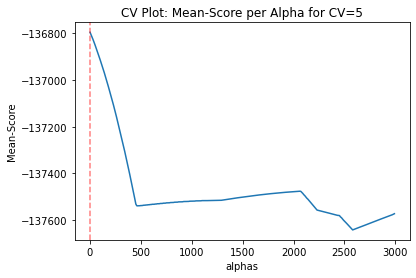

In [14]:
plt.plot(alphas_L,cv_scores_L)
plt.axvline(x=1,linestyle='--',c='r',alpha=0.5)
plt.title("CV Plot: Mean-Score per Alpha for CV=5")
plt.xlabel("alphas")
plt.ylabel("Mean-Score")
plt.show()

Thus, creating a model now with alpha = 1:

In [15]:
np.random.seed(3)
lasso = Lasso(alpha=1,normalize=False,random_state=3)
lasso.fit(x_scaled,y)
lasso.get_params()

{'alpha': 1,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': 3,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

Above, I run the model for alpha = 3000, and print the parameters of the model, as requested in the instructions. 

In [16]:
for name,coef in zip(list(x_scaled.columns),lasso.coef_):
    print(f"The coefficient for {name} is: {coef:,.0f}")

The coefficient for Bedrooms is: -9,358
The coefficient for Bathrooms is: 13,093
The coefficient for Size is: 205,584
The coefficient for Price/SQ.Ft is: 211,296
The coefficient for Status_Foreclosure is: 2,530
The coefficient for Status_Regular is: 11,784
The coefficient for Status_Short Sale is: -2,028


Above, I print the coefficients for each predictor. As can be seen, yet again, Size and Price/Sq.Ft. have huge coefficients, with the other variables having relatively really small coefficients. Because alpha is so small, it doesn't actually reduce any of the variables to 0, which would happen for a bigger punishment term. This is due to the scoring function of our cross validation grid search, which uses the root mean squared error. However, we find that with different scoring methods, the optimal alpha switches from 1 to 3000, depending on how we are scoring. This must directly have to do with the unique situation that our data is comprised of, in which we have 2 perfect predictors. With a higher alpha, all other variables besides those eventually get reduced to 0 or close to 0, while alpha = 1 keeps all variables in the models. Yet as we increase alpha, the coefficients on the two biggest predictors also decrease slightly, which is also unfavorable. Thus, it makes sense why some scoring methods would prefer alpha = 1 (maximize the coefficients of Size and Price/Sq.Ft.), while others might prefer a much higher alpha (reduce all other coefficients to 0, as they are not useful to the model). 

In [17]:
y_preds_L = lasso.predict(x_scaled)
rss_L = sum((y_preds_L-y)**2)
print(f"Residual Sum of Squares: {rss_L:,.0f}")

Residual Sum of Squares: 16,278,852,656,722


Again, here is the RSS printed from the model, in which I predict on the same training dataset. It is large, again, for the same reason as explained above with Ridge. 

Finally, I will plot the LASSO solution path, as asked for in the instructions. To do so, I will use SKLearn's lars_path function, which gives me an array of values I can then alter for plotting, to show the particular coefficients per variable for the Lasso path. 

Computing regularization path using the LARS ...
.

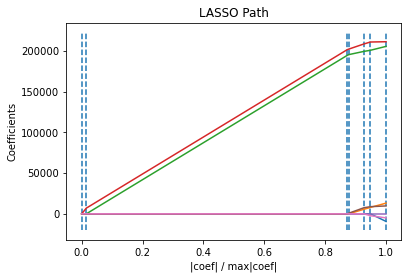

In [18]:
#This code was taken from documentation on sklearn's website:
#https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_lars.html#sphx-glr-auto-examples-linear-model-plot-lasso-lars-py

from sklearn import linear_model

print("Computing regularization path using the LARS ...")
_, _, coefs = linear_model.lars_path(np.array(x_scaled), np.array(y), method="lasso", verbose=True)

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle="dashed")
plt.xlabel("|coef| / max|coef|")
plt.ylabel("Coefficients")
plt.title("LASSO Path")
plt.axis("tight")
plt.show()

# Question 3

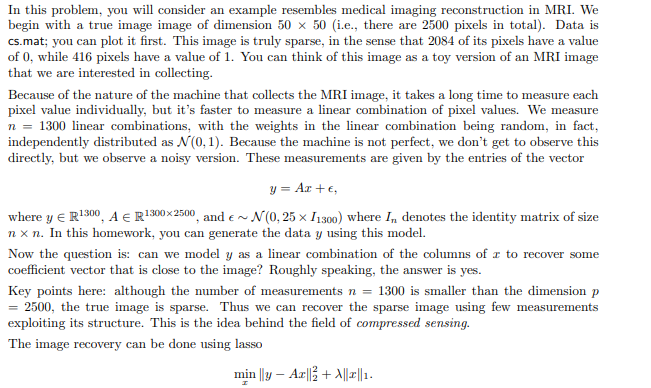

In [19]:
pics = io.loadmat(r'data/cs.mat')['img']

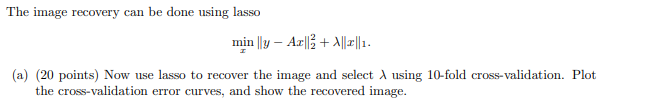

As stated in the question, we are asked to recover the original image from a sparse MRI representation, which is captured, hypothetically, from multiple linear combinations. However, these 1300 linear combinations are processed with random weights, which we can simulate with a standard normal distribution to act as the weights for recreating the original image. See the image below for the MRI image:

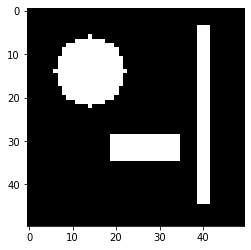

In [20]:
plt.imshow(pics,cmap='gray')

As can be seen, it is clearly sparse, with pixel values of only 1 and 0. Thus, to recover the original image, we first have to multiply a matrix of "random weights" to the sparse data to recover what the original linear combination values might have been, with some added error, using epsilon, a vector of random noise with mean 0, sd 5. These data points are all created below:

In [21]:
A = np.random.normal(size=(1300,2500))
eps = np.random.normal(loc=0, scale=5,size = (1300,1))
yy = np.dot(A,pics.reshape((2500,1))) + eps

Then, finally, we will be using a linear model to predict y (our recovered values of the 1300 linear transformations) from the matrix A, which are the random weights matrix. Because the creation of y only required matrix-multiplying this A with the final sparse data, the coefficients of our linear model should represent (with added noise), the original image, by taking the coefficients of the model. The reason we use ridge and lasso is to reduce some of the coefficients so that it's not SO noisy, and full of more extreme pixel values, as some of it may just be noise that is way too random, and not related, which can be de-noised with these linear models which reduce coefficients. 

As is the case with Lasso or Ridge models, however, we must scale the inputs so that Lasso and Ridge work properly in how they reduce coefficients using lagrangian optimization.

In [22]:
A_scaled = StandardScaler().fit_transform(A)

Then, I finally get to modeling.

## Part a: Recovery with Lasso

To use LASSO, I first must train the best alpha parameter, which I can do using cross validation. I create a range of alpha values, and pass it into a 10-fold Cross Validation algorithm, which I code and plot below:

In [23]:
p3_Lasso = Lasso(normalize=False,random_state=1993)
p3_alphas_cv = list(np.arange(0.1,6,.3))
p3_params = {
    'alpha':p3_alphas_cv
       }
p3_search = GridSearchCV(p3_Lasso,p3_params,cv=10,scoring = 'neg_root_mean_squared_error')
p3_cv_result = p3_search.fit(A_scaled,yy)
p3_scores_L = p3_search.cv_results_['mean_test_score']
print('Best Hyperparameters: %s' % p3_cv_result.best_params_)

Best Hyperparameters: {'alpha': 0.1}


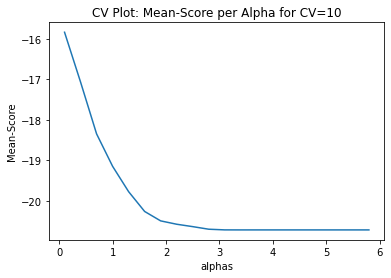

In [24]:
plt.plot(p3_alphas_cv,p3_scores_L)
plt.title("CV Plot: Mean-Score per Alpha for CV=10")
plt.xlabel("alphas")
plt.ylabel("Mean-Score")
plt.show()

As can be seen, the best alpha value is 0.1, and it simply decreases from there. I test from a range of 0.1 to 6, as really small or slight changes in alpha completely change the final image (it's very sensitive to the alpha value), and even then, we still see that the smallest value is the best.

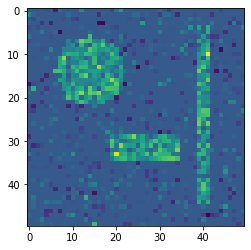

In [25]:
p3_lasso_final = Lasso(alpha=0.1,normalize=False,random_state=1993)
p3_lasso_final.fit(A_scaled,yy)
p3_l_toplot = p3_lasso_final.coef_
plt.imshow(p3_l_toplot.reshape((50,50)))

As can be seen, the image ends up being very similar to our original MRI scan, but now no longer as sparse.

## Part b: Recovery with Ridge

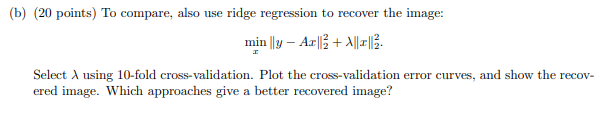

We were able to perform this task with Lasso, which theoretically should create a "more sparse" outcome compared to a ridge model, which cannot reduce coefficients to 0 (in other words, Lasso would have once again reduced some of the noise to 0, making it somewhat sparse again), whereas ridge, we expect to result in a much noisier image, just due to the nature of ridge, in that ridge cannot reduce coefficients fully to 0. Noise does not, in this case, equate to accuracy or inaccuracy, as we don't have any concept of what the target image is supposed to look like, and thus it's not possible to know, in this case, whether Lasso or Ridge lead to a more "realistic" recreation. However, it serves to see how the two models lead to a different image.

Best Hyperparameters: {'alpha': 254}


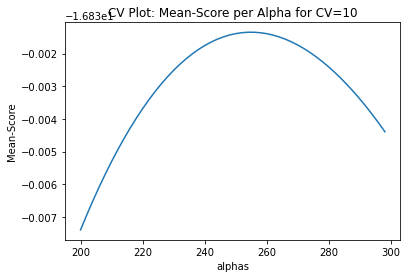

In [26]:
p3_Ridge = Ridge(normalize=False,random_state=1993)
p3_alphas_cv_R = list(np.arange(200,300,2))
p3_params_R = {
    'alpha':p3_alphas_cv_R
       }
p3_search_R = GridSearchCV(p3_Ridge,p3_params_R,cv=10,scoring = 'neg_root_mean_squared_error')
p3_cv_result_R = p3_search_R.fit(A_scaled,yy)
p3_scores_R = p3_search_R.cv_results_['mean_test_score']
print('Best Hyperparameters: %s' % p3_cv_result_R.best_params_)


plt.plot(p3_alphas_cv_R,p3_scores_R)
plt.title("CV Plot: Mean-Score per Alpha for CV=10")
plt.xlabel("alphas")
plt.ylabel("Mean-Score")
plt.show()

Above, I use 10-fold cross validation to find the optimal alpha for a ridge model. After extensive testing behind the scenes (first testing from 1 to 1000 in intervals of 100, finding the optimal to be "300", then trying from 200-400 in intervals of 10, finding it to be 260, and then slowly zooming in), 

my final cross-validation grid search algorithm tests all alphas between 200 and 300 in intervals of 2, and finds 256 to be the optimal alpha, which is a MUCH higher alpha than in the Lasso model, most likely due to ridge's inability to immediately reduce coefficients to 0, and thus as a ridge model, it still favors strongly reducing certain coefficients.

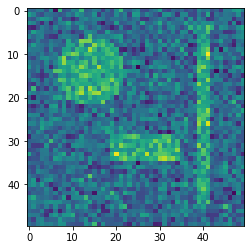

In [27]:
p3_ridge_final = Ridge(alpha=256,normalize=False,random_state=1993)
p3_ridge_final.fit(A_scaled,yy)
p3_r_toplot = p3_ridge_final.coef_
plt.imshow(p3_r_toplot.reshape((50,50)))

As expected, the result is MUCH noiser than in a Lasso model, which again, is expected, as ridge cannot reduce the coefficients to 0, and thus all pixels have a non-zero value, creating "color noise" in our image representation of the matrix.

When we use a lower alpha value, the noise is still just as present, but the color values become more vibrant, thus making "stronger" noise. Whereas if we have an extremely high alpha, the colors start to merge to the same color, but the noise "shape" still must exist, by nature of ridge.